In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow import keras

In [200]:
tf.__version__

'2.1.0'

In [201]:
keras.__version__

'2.2.4-tf'

#### Keras to load the Dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [204]:
X_train_full.shape

(60000, 28, 28)

In [205]:
X_train_full.dtype

dtype('uint8')

#### Pre Processing

In [0]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [207]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [209]:
class_names[y_train[0]]

'Coat'

#### Model Building

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation="softmax"))

In [211]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 784)               3136      
_________________________________________________________________
dense_39 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_25 (Batc (None, 300)               1200      
_________________________________________________________________
dense_40 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_26 (Batc (None, 100)               400       
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [212]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization_24/gamma:0', True),
 ('batch_normalization_24/beta:0', True),
 ('batch_normalization_24/moving_mean:0', False),
 ('batch_normalization_24/moving_variance:0', False)]

In [213]:
model.layers[1].updates

[<tf.Operation 'cond_8/Identity' type=Identity>,
 <tf.Operation 'cond_9/Identity' type=Identity>]

In [0]:
model2 = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(300,use_bias=False),
     keras.layers.BatchNormalization(),
     keras.layers.Activation("relu"),
     keras.layers.Dense(100,use_bias=False),
     keras.layers.BatchNormalization(),
     keras.layers.Activation("relu"),
     keras.layers.Dense(10,activation="softmax")
    ]
)

In [215]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 784)               3136      
_________________________________________________________________
dense_42 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_28 (Batc (None, 300)               1200      
_________________________________________________________________
activation_8 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_29 (Batc (None, 100)             

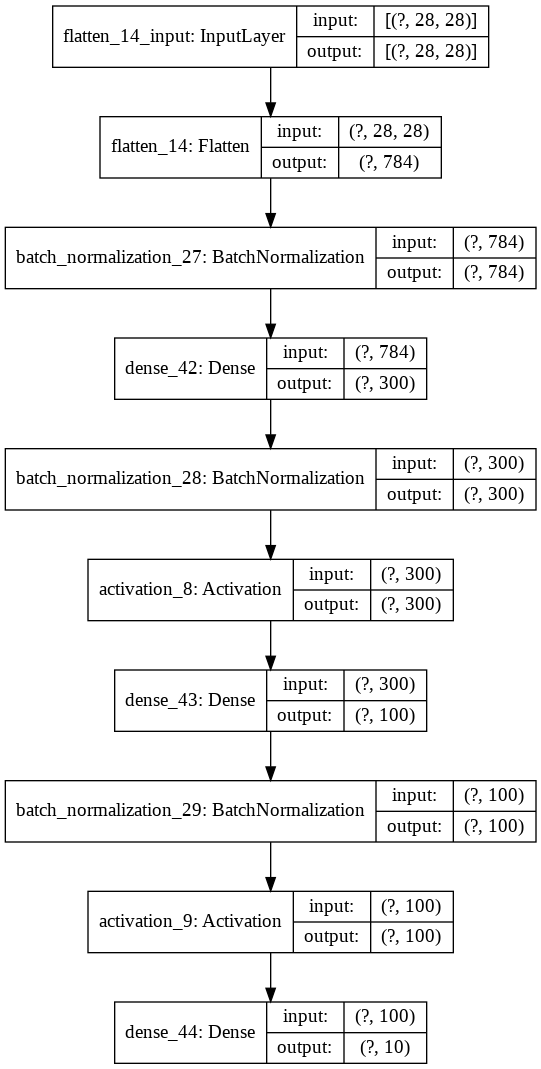

In [216]:
keras.utils.plot_model(model2,show_shapes=True) #Plotting the model

In [217]:
model.layers

In [0]:
hidden_1 = model.layers[1]

In [219]:
hidden_1.name

'batch_normalization_24'

In [0]:
#model.get_layer('dense') is hidden_1

In [0]:
#weights,biases = hidden_1.get_weights()

In [0]:
#weights

In [0]:
#weights.shape

In [0]:
#biases

In [0]:
#biases.shape

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10,activation="softmax"))

#### Compiling the model

In [0]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(clipvalue=1.0),
    metrics=["accuracy"]
)

#### Training the Model

In [228]:
history = model.fit(X_train,y_train, epochs=30)

Train on 55000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.9242 - accuracy: 0.6703
Epoch 2/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.6436 - accuracy: 0.7687
Epoch 3/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.5813 - accuracy: 0.7920
Epoch 4/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.5403 - accuracy: 0.8040
Epoch 5/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.5142 - accuracy: 0.8139
Epoch 6/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4956 - accuracy: 0.8213
Epoch 7/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4792 - accuracy: 0.8274
Epoch 8/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.4677 - accuracy: 0.8292
Epoch 9/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4592 - accuracy: 0.8330
Epoch

In [229]:
history.params

{'batch_size': 32,
 'do_validation': False,
 'epochs': 30,
 'metrics': ['loss', 'accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 1}

In [230]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [231]:
history.history

{'accuracy': [0.6702909,
  0.76872724,
  0.79196364,
  0.8040364,
  0.8138546,
  0.82127273,
  0.8273636,
  0.8292,
  0.83296365,
  0.8362909,
  0.8397818,
  0.84205455,
  0.84596366,
  0.8457636,
  0.8462,
  0.8477455,
  0.8512727,
  0.8532909,
  0.8538182,
  0.85416365,
  0.85647273,
  0.85743636,
  0.8582364,
  0.8591273,
  0.8600364,
  0.86185455,
  0.8633091,
  0.8638727,
  0.86341816,
  0.8630546],
 'loss': [0.924209782669761,
  0.6435924918824976,
  0.5813354621800509,
  0.5403185622822154,
  0.5141863319310275,
  0.49559729104692285,
  0.47918253906423397,
  0.4676668705333363,
  0.45915443833524533,
  0.4477040829181671,
  0.4394690341342579,
  0.4334607249303298,
  0.4238725702805953,
  0.4221424481348558,
  0.41727504042278635,
  0.41397636222839357,
  0.40521704750061033,
  0.4026651497407393,
  0.39761274824142456,
  0.395391107897325,
  0.3910004304495725,
  0.3882832925709811,
  0.38761481095660816,
  0.3834495783025568,
  0.38007255710688503,
  0.3766521659114144,
  0.3

In [232]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

In [234]:
history_df

,loss,accuracy
0,0.924210,0.670291
1,0.643592,0.768727
2,0.581335,0.791964
3,0.540319,0.804036
4,0.514186,0.813855
5,0.495597,0.821273
6,0.479183,0.827364
7,0.467667,0.829200
8,0.459154,0.832964
9,0.447704,0.836291


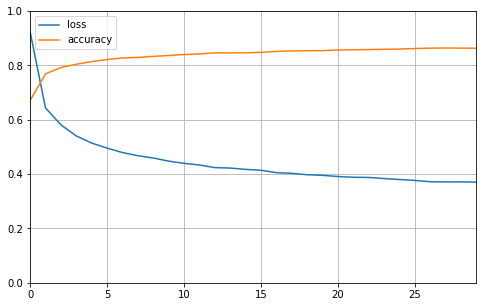

In [235]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Evaluating the model

In [236]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 52.2551 - accuracy: 0.8264


[52.25512415367363, 0.8264]

#### Making Predictions

In [0]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [238]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_pred = model.predict_classes(X_new)

In [240]:
y_pred

array([9, 2, 1])

In [241]:
y_test[:3]

array([9, 2, 1], dtype=uint8)